In [1]:
# Data Preprocessing (Tomilovych, EC-61)

In [2]:
'''
    Для опрацювання було взято 205 спостережень автомобілів за 25 ознаками. Ці ознаки наступні:
1.	symboling — характеризує міру ризику страхової компанії від страхування автомобіля. Приймає цілочисельні значення від -3
(найменш ризиково) до +3 (найбільш ризиково), тобто показує належність до певного класу з множини впорядкованих класів;
2.	make — якісна ознака, що характеризує виробника автомобіля;
3.	fuel type — якісна ознака, що характеризує тип палива, яке використовує автомобіль;
4.	aspiration — якісна ознака, що характеризує тип прискорення автомобіля;
5.	num-of-doors — якісна ознака, що характеризує число дверей автомобіля;
6.	body-style — якісна ознака, що характеризує форм-фактор автомобіля;
7.	drive-wheels — якісна ознака, що характеризує привід автомобіля;
8.	engine-location — якісна ознака, що характеризує місце розташування двигуна;
9.	wheel-base — кількісна ознака, що характеризує колісну базу автомобіля;
10.	length — кількісна ознака, що характеризує довжину автомобіля;
11.	width — кількісна ознака, що характеризує ширину автомобіля;
12.	height — кількісна ознака, що характеризує висоту автомобіля;
13.	curb-weight — кількісна ознака, що характеризує споряджену масу автомобіля;
14.	engine-type — якісна ознака, що характеризує характеризує тип двигуна автомобіля;
15.	num-of-cylinders — якісна ознака, що характеризує число циліндриів двигуна автомобіля;
16.	engine-size — кількісна ознака, що характеризує робочий об'єм двигуна автомобіля;
17.	fuel-system — якісна ознака, що характеризує тип паливної системи автомобіля;
18.	bore — кількісна ознака, що характеризує діаметр поршня;
19.	stroke — кількісна ознака, що характеризує хід поршня;
20.	compression-ratio — кількісна ознака, що характеризує ступінь стиску двигуна автомобіля;
21.	horsepower — кількісна ознака, що характеризує потужність автомобіля в кінських силах;
22.	peak-rpm — кількісна ознака, що характеризує максимальне число обертів за хвилину;
23.	city-mpg — кількісна ознака, що характеризує число проїдених миль на 1 галон палива у місті;
24.	highway-mpg — кількісна ознака, що характеризує число проїдених миль на 1 галон палива за містом;
25.	price — кількісна ознака, що характеризує ціну автомобіля.
    З перелічених ознак можна побачити, що дві з них були віднесені до якісних, хоча за своєю природою вони кількісні:
кількість дверей num-of-doors і число циліндрів num-of-cylinders. Це можна пояснити невеликою кількість значень, які можуть
приймати ці ознаки, а також цілочисельністю цих значень.
    Загалом майже всі ознаки характеризують технічні характеристики автомобілів за винятком міри страхового ризику автомобіля
symboling і ціни автомобіля price. Виходячи з цього, розглядуваний набір даних може бути використаний для вирішення наступних
практичних задач на основі характеристик автомобілів:
• Визначення страхового рейтингу автомобіля;
• Прогнозування ціни автомобіля.
    Але для цього необхідно провести попередню підготовку даних: усунення викидів, обробку відсутніх значень, кодування
якісних змінних і, в разі потреби, шкалювання даних.
'''

"\n    Для опрацювання було взято 205 спостережень автомобілів за 25 ознаками. Ці ознаки наступні:\n1.\tsymboling — характеризує міру ризику страхової компанії від страхування автомобіля. Приймає цілочисельні значення від -3\n(найменш ризиково) до +3 (найбільш ризиково), тобто показує належність до певного класу з множини впорядкованих класів;\n2.\tmake — якісна ознака, що характеризує виробника автомобіля;\n3.\tfuel type — якісна ознака, що характеризує тип палива, яке використовує автомобіль;\n4.\taspiration — якісна ознака, що характеризує тип прискорення автомобіля;\n5.\tnum-of-doors — якісна ознака, що характеризує число дверей автомобіля;\n6.\tbody-style — якісна ознака, що характеризує форм-фактор автомобіля;\n7.\tdrive-wheels — якісна ознака, що характеризує привід автомобіля;\n8.\tengine-location — якісна ознака, що характеризує місце розташування двигуна;\n9.\twheel-base — кількісна ознака, що характеризує колісну базу автомобіля;\n10.\tlength — кількісна ознака, що характери

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
df=pd.read_csv('Cars (Tomilovych, EC-61).csv', sep=';')
df

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,other,gas,std,two,other,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,other,gas,std,two,other,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,other,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,other,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,other,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [5]:
# Descriptive Statistics
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
'''
    Вивівши описову статистику кількісних ознак, побудуємо також графіки розподілу значень цих ознак для перевірки
їхньої відповідності нормальному закону розподілу та подальшій обробці за методами для нормально розподілених даних. Варто
зауважити, що ми не будемо розглядати ознаку symboling як кількісну ознаку при побудові графіків розподілу та усуненні
викидів, оскільки вона відображає належність до певного класу з множини впорядкованих класів.
'''

'\n    Вивівши описову статистику кількісних ознак, побудуємо також графіки розподілу значень цих ознак для перевірки\nїхньої відповідності нормальному закону розподілу та подальшій обробці за методами для нормально розподілених даних. Варто\nзауважити, що ми не будемо розглядати ознаку symboling як кількісну ознаку при побудові графіків розподілу та усуненні\nвикидів, оскільки вона відображає належність до певного класу з множини впорядкованих класів.\n'

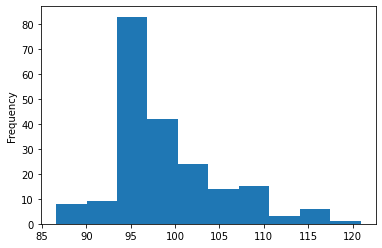

In [7]:
# Wheel base distribution
df['wheel-base'].plot(kind='hist')

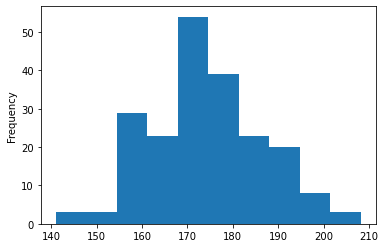

In [8]:
# Length distribution
df['length'].plot(kind='hist')

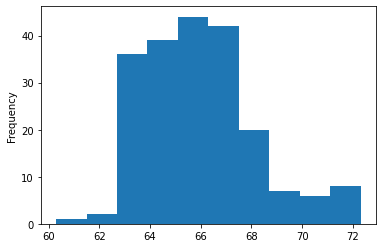

In [9]:
# Width distribution
df['width'].plot(kind='hist')

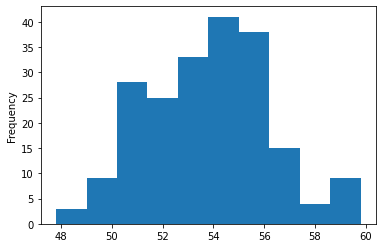

In [10]:
# Height distribution
df['height'].plot(kind='hist')

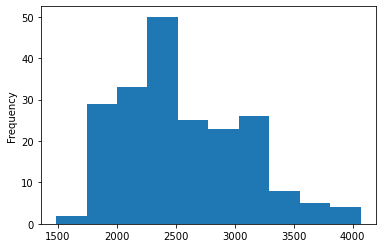

In [11]:
# Curb Weight distribution
df['curb-weight'].plot(kind='hist')

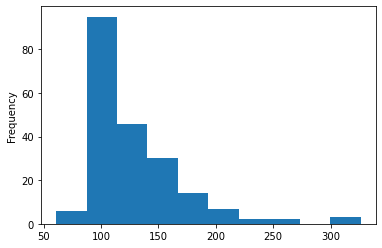

In [12]:
# Engine size distribution
df['engine-size'].plot(kind='hist')

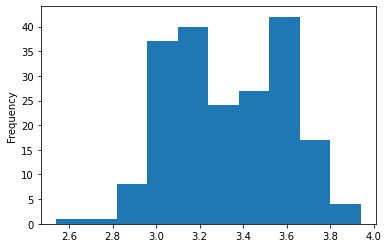

In [13]:
# Bore distribution
df['bore'].plot(kind='hist')

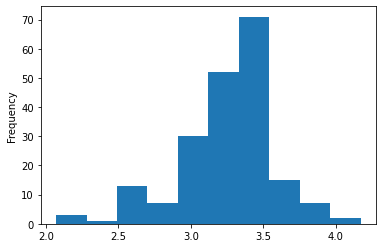

In [14]:
# Stroke distribution
df['stroke'].plot(kind='hist')

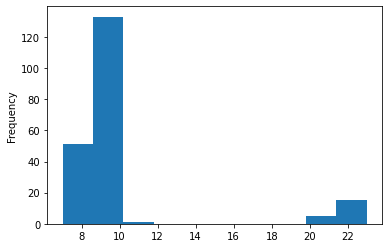

In [15]:
# Compression ratio distribution
df['compression-ratio'].plot(kind='hist')

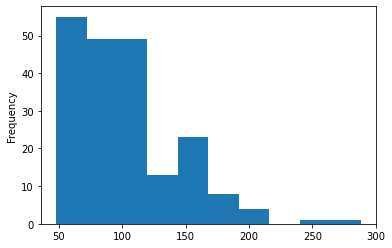

In [16]:
# Horsepower distribution
df['horsepower'].plot(kind='hist')

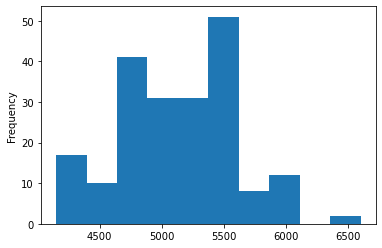

In [17]:
# Peak rpm distribution
df['peak-rpm'].plot(kind='hist')

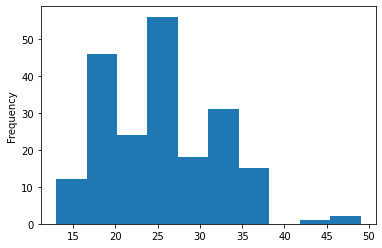

In [18]:
# City mpg distribution
df['city-mpg'].plot(kind='hist')

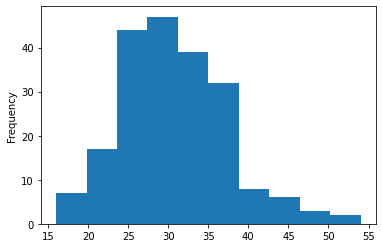

In [19]:
# Highway mpg distribution
df['highway-mpg'].plot(kind='hist')

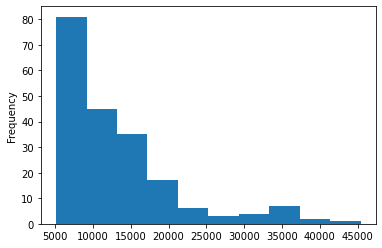

In [20]:
# Price distribution
df['price'].plot(kind='hist')

In [21]:
'''
    Розглянувши графіки розподілу значень кількісних ознак, можна побачити, що відсутні спостереження, які можна трактувати
як помилки, а графіки є досить симетричними і близькими до нормального розподілу, а тому для них можна розглядати
як викиди ті значення змінних, що не потрапляють в інтервал середнє значення±3 стандартні відхилення. Максимальним і
мінімальним викидам буде присвоєно відповідно максимальне і мінімальне значення, що входить в цей інтервал.
'''

'\n    Розглянувши графіки розподілу значень кількісних ознак, можна побачити, що відсутні спостереження, які можна трактувати\nяк помилки, а графіки є досить симетричними і близькими до нормального розподілу, а тому для них можна розглядати\nяк викиди ті значення змінних, що не потрапляють в інтервал середнє значення±3 стандартні відхилення. Максимальним і\nмінімальним викидам буде присвоєно відповідно максимальне і мінімальне значення, що входить в цей інтервал.\n'

In [22]:
# Outliers
print('Outliers:')
bases=[]
i=0
j=0
for base in df['wheel-base']:
    if base>round(df['wheel-base'].mean()+3*df['wheel-base'].std(), 1):
        base=round(df['wheel-base'].mean()+3*df['wheel-base'].std(), 1)
        i=i+1
    elif base<round(df['wheel-base'].mean()-3*df['wheel-base'].std(), 1):
        base=round(df['wheel-base'].mean()-3*df['wheel-base'].std(), 1)
        i=i+1
    bases.append(base)
print('wheel_base '+str(i))
j=j+i
df['wheel-base']=bases

lengths=[]
for lng in df['length']:
    i=0
    if lng>round(df['length'].mean()+3*df['length'].std(), 1):
        lng=round(df['length'].mean()+3*df['length'].std(), 1)
        i=i+1
    elif lng<round(df['length'].mean()-3*df['length'].std(), 1):
        lng=round(df['length'].mean()-3*df['length'].std(), 1)
        i=i+1
    lengths.append(lng)
print('length '+str(i))
j=j+i
df['length']=lengths

widths=[]
i=0
for wid in df['width']:
    if wid>round(df['width'].mean()+3*df['width'].std(), 1):
        wid=round(df['width'].mean()+3*df['width'].std(), 1)
        i=i+1
    elif wid<round(df['width'].mean()-3*df['width'].std(), 1):
        wid=round(df['width'].mean()-3*df['width'].std(), 1)
        i=i+1
    widths.append(wid)
print('width '+str(i))
j=j+i
df['width']=widths

heights=[]
i=0
for heig in df['height']:
    if heig>round(df['height'].mean()+3*df['height'].std(), 1):
        heig=round(df['height'].mean()+3*df['height'].std(), 1)
        i=i+1
    elif heig<round(df['height'].mean()-3*df['height'].std(), 1):
        heig=round(df['height'].mean()-3*df['height'].std(), 1)
        i=i+1
    heights.append(heig)
print('height '+str(i))
j=j+i
df['height']=heights

weights=[]
i=0
for weight in df['curb-weight']:
    if weight>round(df['curb-weight'].mean()+3*df['curb-weight'].std()):
        weight=round(df['curb-weight'].mean()+3*df['curb-weight'].std())
        i=i+1
    elif weight<round(df['curb-weight'].mean()-3*df['curb-weight'].std()):
        weight=round(df['curb-weight'].mean()-3*df['curb-weight'].std())
        i=i+1
    weights.append(weight)
print('curb-weight '+str(i))
j=j+i
df['curb-weight']=weights

sizes=[]
i=0
for size in df['engine-size']:
    if size>round(df['engine-size'].mean()+3*df['engine-size'].std()):
        size=round(df['engine-size'].mean()+3*df['engine-size'].std())
        i=i+1
    elif size<round(df['engine-size'].mean()-3*df['engine-size'].std()):
        size=round(df['engine-size'].mean()-3*df['engine-size'].std())
        i=i+1
    sizes.append(size)
print('engine-size '+str(i))
j=j+i
df['engine-size']=sizes

bores=[]
i=0
for br in df['bore']:
    if br>round(df['bore'].mean()+3*df['bore'].std(), 2):
        br=round(df['bore'].mean()+3*df['bore'].std(), 2)
        i=i+1
    elif br<round(df['bore'].mean()-3*df['bore'].std(), 2):
        br=round(df['bore'].mean()-3*df['bore'].std(), 2)
        i=i+1
    bores.append(br)
print('bore '+str(i))
j=j+i
df['bore']=bores

strokes=[]
i=0
for st in df['stroke']:
    if st>round(df['stroke'].mean()+3*df['stroke'].std(), 2):
        st=round(df['stroke'].mean()+3*df['stroke'].std(), 2)
        i=i+1
    elif st<round(df['stroke'].mean()-3*df['stroke'].std(), 2):
        st=round(df['stroke'].mean()-3*df['stroke'].std(), 2)
        i=i+1
    strokes.append(st)
print('stroke '+str(i))
j=j+i
df['stroke']=strokes

ratios=[]
i=0
for ratio in df['compression-ratio']:
    if ratio>round(df['compression-ratio'].mean()+3*df['compression-ratio'].std(), 2):
        ratio=round(df['compression-ratio'].mean()+3*df['compression-ratio'].std(), 2)
        i=i+1
    elif ratio<round(df['compression-ratio'].mean()-3*df['compression-ratio'].std(), 2):
        ratio=round(df['compression-ratio'].mean()-3*df['compression-ratio'].std(), 2)
        i=i+1
    ratios.append(ratio)
print('compression-ratio '+str(i))
j=j+i
df['compression-ratio']=ratios

powers=[]
i=0
for power in df['horsepower']:
    if power>round(df['horsepower'].mean()+3*df['horsepower'].std()):
        power=round(df['horsepower'].mean()+3*df['horsepower'].std())
        i=i+1
    elif power<round(df['horsepower'].mean()-3*df['horsepower'].std()):
        power=round(df['horsepower'].mean()-3*df['horsepower'].std())
        i=i+1
    powers.append(power)
print('horsepower '+str(i))
j=j+i
df['horsepower']=powers

rpms=[]
i=0
for rpm in df['peak-rpm']:
    if rpm>round(df['peak-rpm'].mean()+3*df['peak-rpm'].std()):
        rpm=round(df['peak-rpm'].mean()+3*df['peak-rpm'].std())
        i=i+1
    elif rpm<round(df['peak-rpm'].mean()-3*df['peak-rpm'].std()):
        rpm=round(df['peak-rpm'].mean()-3*df['peak-rpm'].std())
        i=i+1
    rpms.append(rpm)
print('peak-rpm '+str(i))
j=j+i
df['peak-rpm']=rpms

cmpgs=[]
i=0
for cmpg in df['city-mpg']:
    if cmpg>round(df['city-mpg'].mean()+3*df['city-mpg'].std()):
        cmpg=round(df['city-mpg'].mean()+3*df['city-mpg'].std())
        i=i+1
    elif cmpg<round(df['city-mpg'].mean()-3*df['city-mpg'].std()):
        cmpg=round(df['city-mpg'].mean()-3*df['city-mpg'].std())
        i=i+1
    cmpgs.append(cmpg)
print('city-mpg '+str(i))
j=j+i
df['city-mpg']=cmpgs

hmpgs=[]
i=0
for hmpg in df['highway-mpg']:
    if hmpg>round(df['highway-mpg'].mean()+3*df['highway-mpg'].std()):
        hmpg=round(df['highway-mpg'].mean()+3*df['highway-mpg'].std())
        i=i+1
    elif hmpg<round(df['highway-mpg'].mean()-3*df['highway-mpg'].std()):
        hmpg=round(df['highway-mpg'].mean()-3*df['highway-mpg'].std())
        i=i+1
    hmpgs.append(hmpg)
print('highway-mpg '+str(i))
j=j+i
df['highway-mpg']=hmpgs

prices=[]
i=0
for prc in df['price']:
    if prc>round(df['price'].mean()+3*df['price'].std()):
        prc=round(df['price'].mean()+3*df['price'].std())
        i=i+1
    elif prc<round(df['price'].mean()-3*df['price'].std()):
        prc=round(df['price'].mean()-3*df['price'].std())
        i=i+1
    prices.append(prc)
print('price '+str(i))
j=j+1
df['price']=prices

print('GRAND TOTAL '+str(j))

Outliers:
wheel_base 1
length 0
width 0
height 0
curb-weight 0
engine-size 5
bore 0
stroke 3
compression-ratio 9
horsepower 2
peak-rpm 2
city-mpg 2
highway-mpg 2
price 3
GRAND TOTAL 27


In [23]:
'''
    Можна побачити, що всього було виявлено та усунено 27 викидів, що не є великим числом порівняно з загальним числом
усіх значень кількісних змінних, а отже пророблена зверху процедура допомогла позбутися викидів, але не спотворила початкових
значень даних у значній мірі. далі можна перейти до обробки відстуніх значень.
'''

'\n    Можна побачити, що всього було виявлено та усунено 27 викидів, що не є великим числом порівняно з загальним числом\nусіх значень кількісних змінних, а отже пророблена зверху процедура допомогла позбутися викидів, але не спотворила початкових\nзначень даних у значній мірі. далі можна перейти до обробки відстуніх значень.\n'

In [24]:
# Descriptive Statistics
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.736585,174.049268,65.907805,53.724878,2555.565854,125.960976,3.329751,3.257811,10.110049,103.743842,5125.004926,25.190244,30.726829,13124.885572
std,1.245307,5.954301,12.337289,2.145204,2.443522,520.680204,37.940336,0.273539,0.308762,3.869288,37.765737,478.220262,6.444933,6.809272,7661.044091
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.310000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,116.800000,208.100000,72.300000,59.800000,4066.000000,252.000000,3.940000,4.170000,22.060000,223.000000,6563.000000,45.000000,51.000000,37048.000000


In [25]:
# Cheking NaN
nan_by_column=df.isnull().sum()
print(nan_by_column)

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64


In [26]:
'''
    Можна побачити, що число пропущених значень невелике, а отже їх можна заповнити, не спотворюючи початкові значення даних
у значній мірі. Пропущені значення буде оброблено наступним чином: пропущеним значенням кількісних ознак буде присвоєно
середнє значення відповідної ознаки, а якісних - найбільш частотне. Після заповнення відсутніх значень можна перейти до
кодування якісних змінних.
'''

'\n    Можна побачити, що число пропущених значень невелике, а отже їх можна заповнити, не спотворюючи початкові значення даних\nу значній мірі. Пропущені значення буде оброблено наступним чином: пропущеним значенням кількісних ознак буде присвоєно\nсереднє значення відповідної ознаки, а якісних - найбільш частотне. Після заповнення відсутніх значень можна перейти до\nкодування якісних змінних.\n'

In [27]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
#strings
imputer_freq=SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(df[['num-of-doors']])
df[['num-of-doors']]=imputer_freq.fit_transform(df[['num-of-doors']])
#numeric
df[['bore']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['bore']])
df[['bore']]=round(df[['bore']], 2)
df[['stroke']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['stroke']])
df[['stroke']]=round(df[['stroke']], 2)
df[['horsepower']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['horsepower']])
df[['horsepower']]=round(df[['horsepower']])
df[['peak-rpm']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['peak-rpm']])
df[['peak-rpm']]=round(df[['peak-rpm']])
df[['price']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['price']])
df[['price']]=round(df[['price']])

In [28]:
# Checking number of levels of categorical features
for feature in ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']:
    print(feature)
    print(df[feature].unique())

make
['other' 'honda' 'mazda' 'mitsubishi' 'nissan' 'peugot' 'subaru' 'toyota'
 'volkswagen' 'volvo']
fuel-type
['gas' 'diesel']
aspiration
['std' 'turbo']
num-of-doors
['two' 'four']
body-style
['other' 'hatchback' 'sedan' 'wagon']
drive-wheels
['rwd' 'fwd' '4wd']
engine-location
['front' 'rear']
engine-type
['dohc' 'ohcv' 'ohc' 'l' 'other' 'ohcf']
num-of-cylinders
['four' 'six' 'five' 'fewer than four' 'more than six']
fuel-system
['mpfi' '2bbl' 'other' '1bbl' 'idi']


In [29]:
'''
    4 з 10 якісних змінних мають по 2 рівні і для їх кодування буде використано LabelEncoder. 6 інших якісних змінних мають
більш, ніж 2 рівні, а тому для їх кодування буде використано OneHotEncoder.
'''

'\n    4 з 10 якісних змінних мають по 2 рівні і для їх кодування буде використано LabelEncoder. 6 інших якісних змінних мають\nбільш, ніж 2 рівні, а тому для їх кодування буде використано OneHotEncoder.\n'

In [30]:
# Encoding categorical data
# Encoding categorical features with 2 levels
from sklearn.preprocessing import LabelEncoder
df[['fuel-type']]=LabelEncoder().fit_transform(df[['fuel-type']])
df[['aspiration']]=LabelEncoder().fit_transform(df[['aspiration']])
df[['num-of-doors']]=LabelEncoder().fit_transform(df[['num-of-doors']])
df[['engine-location']]=LabelEncoder().fit_transform(df[['engine-location']])
# Encoding categorical features with more than 2 levels
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder().fit_transform(df[['make']]).toarray()
df=pd.get_dummies(df, prefix='make', prefix_sep='.', columns=['make'])
df.drop('make.other', axis=1, inplace=True)

OneHotEncoder().fit_transform(df[['body-style']]).toarray()
df=pd.get_dummies(df, prefix='body-style', prefix_sep='.', columns=['body-style'])
df.drop('body-style.other', axis=1, inplace=True)

OneHotEncoder().fit_transform(df[['drive-wheels']]).toarray()
df=pd.get_dummies(df, prefix='drive-wheels', prefix_sep='.', columns=['drive-wheels'])
df.drop('drive-wheels.4wd', axis=1, inplace=True)

OneHotEncoder().fit_transform(df[['engine-type']]).toarray()
df=pd.get_dummies(df, prefix='engine-type', prefix_sep='.', columns=['engine-type'])
df.drop('engine-type.other', axis=1, inplace=True)

OneHotEncoder().fit_transform(df[['num-of-cylinders']]).toarray()
df=pd.get_dummies(df, prefix='num-of-cylinders', prefix_sep='.', columns=['num-of-cylinders'])
df.drop('num-of-cylinders.fewer than four', axis=1, inplace=True)

OneHotEncoder().fit_transform(df[['fuel-system']]).toarray()
df=pd.get_dummies(df, prefix='fuel-system', prefix_sep='.', columns=['fuel-system'])
df.drop('fuel-system.other', axis=1, inplace=True)

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [31]:
# Moving variable 'price' in the end of dataframe
price=df['price']
df.drop('price', axis=1, inplace=True)
df['price']=price

In [32]:
df

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,engine-type.ohcv,num-of-cylinders.five,num-of-cylinders.four,num-of-cylinders.more than six,num-of-cylinders.six,fuel-system.1bbl,fuel-system.2bbl,fuel-system.idi,fuel-system.mpfi,price
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,13495.0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,16500.0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,1,0,0,0,1,16500.0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,0,0,1,13950.0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,0,0,1,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,0,109.1,188.8,68.9,55.5,2952,...,0,0,1,0,0,0,0,0,1,16845.0
201,-1,1,1,0,0,109.1,188.8,68.8,55.5,3049,...,0,0,1,0,0,0,0,0,1,19045.0
202,-1,1,0,0,0,109.1,188.8,68.9,55.5,3012,...,1,0,0,0,1,0,0,0,1,21485.0
203,-1,0,1,0,0,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,1,0,0,1,0,22470.0


In [33]:
# Descriptive Statistics
df.describe()

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,engine-type.ohcv,num-of-cylinders.five,num-of-cylinders.four,num-of-cylinders.more than six,num-of-cylinders.six,fuel-system.1bbl,fuel-system.2bbl,fuel-system.idi,fuel-system.mpfi,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.434146,0.014634,98.736585,174.049268,65.907805,53.724878,2555.565854,...,0.063415,0.053659,0.775610,0.029268,0.117073,0.053659,0.321951,0.097561,0.458537,13124.887805
std,1.245307,0.297446,0.385535,0.496858,0.120377,5.954301,12.337289,2.145204,2.443522,520.680204,...,0.244304,0.225894,0.418201,0.168970,0.322294,0.225894,0.468368,0.297446,0.499498,7585.563984
min,-2.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7788.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10595.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,16500.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,116.800000,208.100000,72.300000,59.800000,4066.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,37048.000000


In [34]:
'''
    Нижче наведено код для шкалування даних у разі потреби.
'''

'\n    Нижче наведено код для шкалування даних у разі потреби.\n'

In [35]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#dfsc=sc.fit_transform(df)
#df['wheel-base']=dfsc[:,5]
#df['length']=dfsc[:,6]
#df['width']=dfsc[:,7]
#df['height']=dfsc[:,8]
#df['curb-weight']=dfsc[:,9]
#df['engine-size']=dfsc[:,10]
#df['bore']=dfsc[:,11]
#df['stroke']=dfsc[:,12]
#df['compression-ratio']=dfsc[:,13]
#df['horsepower']=dfsc[:,14]
#df['peak-rpm']=dfsc[:,15]
#df['city-mpg']=dfsc[:,16]
#df['highway-mpg']=dfsc[:,17]
#df['price']=dfsc[:,45]

In [36]:
'''
    У даній лабораторній роботі було проведено усунення викидів, обробку відсутніх даних і кодування якісних ознак, а також
написано код для шкалювання даних у разі потреби. Попередньо оброблені дані можна використовувати для подальшого використання
при вирішенні практичних задач.
'''

'\n    У даній лабораторній роботі було проведено усунення викидів, обробку відсутніх даних і кодування якісних ознак, а також\nнаписано код для шкалювання даних у разі потреби. Попередньо оброблені дані можна використовувати для подальшого використання\nпри вирішенні практичних задач.\n'

In [37]:
# Exporting the dataset
df.to_csv('Cars_prep (Tomilovych, EC-61).csv', sep=';', index=False)